## 9. Detecção de Fraude - Isolation Forest

Passos:

 - Passo 1 - Carregar as bibliotecas
 - Passo 2 - Carregar a base de dados
 - Passo 3 - Tratamento, entendimento e a descriçao dos dados
 - Passo 4 - Preparaçao da base para treinamento e teste
 - Passo 5 - Treinamento do modelo
 - Passo 6 - Avaliaçao dos Resultados
 - Passo 7 - Treinando um modelo mais eficiente

________________________________________________________


### Passo 1 - Carregar as bibliotecas

In [1]:
# Carregando as bibliotecas

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np


In [2]:
# Para remover os warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

______________________________________________________

### Passo 2 - Carregar a base de dados

In [ ]:
# Link para o download https://www.kaggle.com/mlg-ulb/creditcardfraud

In [3]:
# Carregando a base de dados e fazendo os checks iniciais

# Muda o diretorio de trabalho
import os
os.chdir("C:\\Users\\engle\\OM Na Pratica\\Ciência dos Dados com Python\\Bases de Dados")

df1 = pd.read_csv("creditcard.csv", sep = ",")

df1.shape[0]

284807

In [4]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


______________________________________________________

### Passo 3 - Tratamento, entendimento e a descriçao dos dados

In [5]:
# Estatisticas da base

df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Existem missing values?

df1.isnull().values.any()

False

In [7]:
# Como é a distribuiçao entre as classes?

print("Percentual de fraudes: {}".format(round(df1[df1["Class"] == 1].shape[0]/df1.shape[0]*100, 3)))

Percentual de fraudes: 0.173


In [8]:
# Voce também pode fazer o mesmo calculo assim

print("Percentual de fraudes: " + str(round(df1[df1["Class"] == 1].shape[0]/df1.shape[0]*100, 3)))

Percentual de fraudes: 0.173


In [11]:
df1["Class"].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [12]:
# Estatisticas para fraudes (0) e nao fraudes (1)

df1[df1["Class"] == 0]["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
df1[df1["Class"] == 1]["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

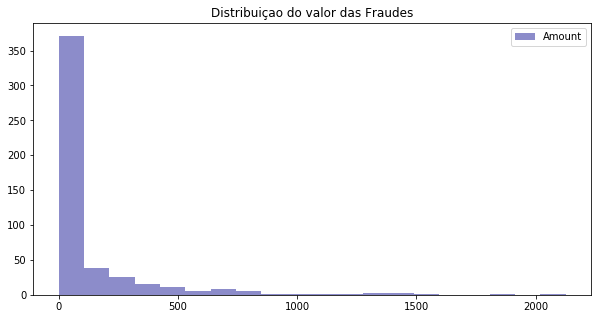

In [15]:
plt.figure(figsize = (10,5))
plt.hist(df1[df1["Class"] == 1]["Amount"], bins = 20
        , alpha = 0.45
        , histtype = "stepfilled"
        , color = "darkblue"
        , edgecolor = "none"
        , label = "Amount");

plt.legend()
plt.title("Distribuiçao do valor das Fraudes");

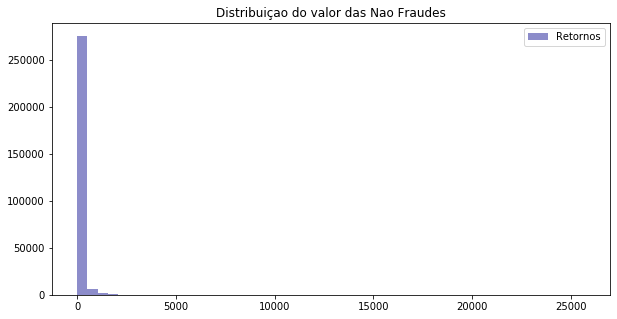

In [16]:
plt.figure(figsize = (10,5))
plt.hist(df1[df1["Class"] == 0]["Amount"], bins = 50
        , alpha = 0.45
        , histtype = "stepfilled"
        , color = "darkblue"
        , edgecolor = "none"
        , label = "Amount");

plt.legend()
plt.title("Distribuiçao do valor das Nao Fraudes");

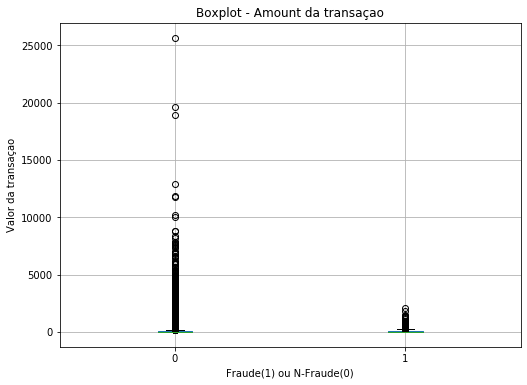

In [17]:
df1.boxplot(by ="Class", column =["Amount"], grid = True, figsize = (8,6)); 
title = "Boxplot - ""Amount"" da transaçao"
plt.title(title)
plt.suptitle("") #para eliminar o titulo padrao do boxplot do pandas
plt.ylabel("Valor da transaçao")
plt.xlabel("Fraude(1) ou N-Fraude(0)")
plt.show()

______________________________________________________

### Passo 4 - Preparaçao da base para treinamento e teste

In [18]:
# Separando os dados entre treinamento e teste

# Separando os dados com as variaveis em x e o alvo em y

x = df1.drop("Class", axis = 1)
y = df1["Class"]

# Separando entre treinamento e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

In [19]:
len(x)

284807

______________________________________________________

### Passo 5 - Treinamento do modelo

In [20]:
# Treinando o modelo

if1 = IsolationForest(n_estimators = 200, max_samples = len(x), random_state = 42)

if1.fit(x_train) # essa é a linha que treina o modelo!!!!


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples=284807, n_estimators=200,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [21]:
# Prediçoes para o treinamento e teste

y_pred_train1 = if1.predict(x_train)
y_pred_test1 = if1.predict(x_test)

# Returns -1 for outliers and 1 for inliers.

In [22]:
y_pred_test1

array([-1,  1,  1, ...,  1,  1, -1])

In [23]:
# Returns -1 for outliers and 1 for inliers.

# Reajustando a previsao para ficar alinhado com a Class da base

y_pred_train1 = np.where(y_pred_train1 == -1, 1, 0)
y_pred_test1 = np.where(y_pred_test1 == -1, 1, 0)

In [24]:
print(np.count_nonzero(y_pred_train1 == 1))

print(np.count_nonzero(y_train == 1))

14241
246


In [25]:
print(np.count_nonzero(y_pred_test1 == 1))

print(np.count_nonzero(y_test == 1))

14285
246


______________________________________________________

### Passo 6 - Avaliaçao dos Resultados

In [26]:
print("Base de treinamento")
print("Percentual de fraudes: {}".format(round(accuracy_score(y_train,y_pred_train1)*100, 2)))
print("------------------------------")
print("Base de teste")
print("Percentual de fraudes: {}".format(round(accuracy_score(y_test,y_pred_test1)*100, 2)))

Base de treinamento
Percentual de fraudes: 90.13
------------------------------
Base de teste
Percentual de fraudes: 90.11


##### Porém, lembrem-se
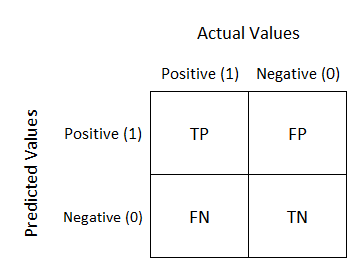

In [27]:
# Treinamento

print(confusion_matrix(y_train, y_pred_train1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_train, y_pred_train1))

[[128134  14023]
 [    28    218]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    142157
           1       0.02      0.89      0.03       246

    accuracy                           0.90    142403
   macro avg       0.51      0.89      0.49    142403
weighted avg       1.00      0.90      0.95    142403



In [28]:
# Teste

print(confusion_matrix(y_test, y_pred_test1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test, y_pred_test1))

[[128094  14064]
 [    25    221]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    142158
           1       0.02      0.90      0.03       246

    accuracy                           0.90    142404
   macro avg       0.51      0.90      0.49    142404
weighted avg       1.00      0.90      0.95    142404



In [ ]:
# Teriamos bloqueado 14064 transaçoes

In [29]:
# Lembra das médias

print("Nao Fraude")
print("Valor médio: {}".format(round(df1[df1["Class"] == 0]["Amount"].describe()[1], 2)))
print("------------------------------")
print("Fraude")
print("Valor médio: {}".format(round(df1[df1["Class"] == 1]["Amount"].describe()[1], 2)))

Nao Fraude
Valor médio: 88.29
------------------------------
Fraude
Valor médio: 122.21


In [31]:
import locale
locale.setlocale( locale.LC_ALL, '' )

'Italian_Italy.1252'

In [32]:
print("Teriamos bloqueado mediamente: {}".format(locale.currency(
    round(df1[df1["Class"] == 1]["Amount"].describe()[1]*221, 2), grouping=True)))
print("------------------------------")
print("Ao custo médio de : {}".format(locale.currency(
    round(df1[df1["Class"] == 0]["Amount"].describe()[1]*14064, 2), grouping=True)))

Teriamos bloqueado mediamente: 27.008,70 €
------------------------------
Ao custo médio de : 1.241.724,94 €


In [33]:
# Mas qual o valor real?

df1["IF"] = np.where(if1.predict(df1.iloc[:, 0:30]) == -1, 1, 0)

In [34]:
df1[df1["Class"] == 1]["Amount"].sum()

60127.97

In [35]:
df1[df1["IF"] == 1]["Amount"].sum()

8154490.01

In [36]:
print("Teriamos bloqueado: {}".format(locale.currency(df1[(df1["IF"] == 1) & (df1["Class"] == 1)]["Amount"].sum()
                                                      , grouping=True)))
print()
print("% do total: {}".format(round(df1[(df1["IF"] == 1) & (df1["Class"] == 1)]["Amount"].sum()/
                                              df1[df1["Class"] == 1]["Amount"].sum()*100, 2)))
print()
print("Deixando passar : {}".format(locale.currency(df1[(df1["IF"] == 0) & (df1["Class"] == 1)]["Amount"].sum()
                                                    , grouping=True)))
print("------------------------------")
print("Ao custo de : {}".format(locale.currency(df1[(df1["IF"] == 1) & (df1["Class"] == 0)]["Amount"].sum(), grouping=True)))
print("")
print("% do total: {}".format(round(df1[(df1["IF"] == 0) & (df1["Class"] == 0)]["Amount"].sum()/
                                              df1[df1["Class"] == 0]["Amount"].sum()*100, 2)))

Teriamos bloqueado: 54.744,55 €

% do total: 91.05

Deixando passar : 5.383,42 €
------------------------------
Ao custo de : 8.099.745,46 €

% do total: 67.73


______________________________________________________

### Passo 7 - Treinando um modelo mais eficiente

In [37]:
# Treinando o modelo

if2 = IsolationForest(n_estimators = 1, max_samples = 100000, max_features = 1.0, random_state = 42)

if2.fit(x_train) # essa é a linha que treina o modelo!!!!


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples=100000, n_estimators=1,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [38]:
# Prediçoes para o treinamento e teste

y_pred_train2 = if2.predict(x_train)
y_pred_test2 = if2.predict(x_test)

# Returns -1 for outliers and 1 for inliers.

In [39]:
# Returns -1 for outliers and 1 for inliers.

# Reajustando a previsao para ficar alinhado com a Class da base

y_pred_train2 = np.where(y_pred_train2 == -1, 1, 0)
y_pred_test2 = np.where(y_pred_test2 == -1, 1, 0)

______________________________________________________

### Passo 8 - Avaliaçao dos novos resultados

In [40]:
print("Base de treinamento")
print("Percentual de fraudes: {}".format(round(accuracy_score(y_train,y_pred_train2)*100, 2)))
print("------------------------------")
print("Base de teste")
print("Percentual de fraudes: {}".format(round(accuracy_score(y_test,y_pred_test2)*100, 2)))

Base de treinamento
Percentual de fraudes: 93.07
------------------------------
Base de teste
Percentual de fraudes: 93.19


In [41]:
# Mas qual o valor real?

df1["IF2"] = np.where(if2.predict(df1.iloc[:, 0:30]) == -1, 1, 0)

In [42]:
print("Teriamos bloqueado: {}".format(locale.currency(df1[(df1["IF2"] == 1) & (df1["Class"] == 1)]["Amount"].sum()
                                                      , grouping=True)))
print()
print("% do total: {}".format(round(df1[(df1["IF2"] == 1) & (df1["Class"] == 1)]["Amount"].sum()/
                                              df1[df1["Class"] == 1]["Amount"].sum()*100, 2)))
print()
print("Deixando passar : {}".format(locale.currency(df1[(df1["IF2"] == 0) & (df1["Class"] == 1)]["Amount"].sum()
                                                    , grouping=True)))
print("------------------------------")
print("Ao custo de : {}".format(locale.currency(df1[(df1["IF2"] == 1) & (df1["Class"] == 0)]["Amount"].sum(), grouping=True)))
print("")
print("% do total ainda aceito: {}".format(round(df1[(df1["IF2"] == 0) & (df1["Class"] == 0)]["Amount"].sum()/
                                              df1[df1["Class"] == 0]["Amount"].sum()*100, 2)))

Teriamos bloqueado: 29.349,02 €

% do total: 48.81

Deixando passar : 30.778,95 €
------------------------------
Ao custo de : 2.918.614,39 €

% do total ainda aceito: 88.37


#### Resultado anterior

Teriamos bloqueado: 54.744,55 €

% do total: 91.05

Deixando passar : 5.383,42 €

Ao custo de : 8.099.745,46 €

% do total ainda aceito: 67.73

In [ ]:
df1[df1["Class"] == 1]["Amount"].sum()

In [ ]:
df1[df1["Class"] == 0]["Amount"].sum()